In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
import blackjackAgent

In [3]:
n_cards = 10

n_states = n_cards**2 * 2
n_actions = 2
n_estimates = n_states * n_actions

In [4]:
n_estimates

400

In [5]:
l_epoch = 128
episodes = 50

In [6]:
agent = blackjackAgent.BlackjackAgent(n_actions, n_states, n_replicates=2)

In [7]:
agent.hippocampus.blocks

{'feedback_delay': <primitives.OrNode at 0x7fa0fbcac390>,
 'feedback_sum': <primitives.OrNode at 0x7fa0fbcac128>,
 'filter': <primitives.AndNode at 0x7fa0fbf39a58>,
 'punishment_buffer': <primitives.OrNode at 0x7fa0fbcac4a8>,
 'punishment_gate': <primitives.AndNode at 0x7fa0fbd5aa58>,
 'reward_buffer': <primitives.OrNode at 0x7fa0fbc0e438>,
 'reward_gate': <primitives.AndNode at 0x7fa0fbd5a278>,
 'state_memory': <primitives.FlipFlopNode at 0x7fa0fbf398d0>}

In [8]:
dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [9]:
hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [10]:
pun_spks = agent.hippocampus.blocks['punishment_gate'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [11]:
rwd_spks = agent.hippocampus.blocks['reward_gate'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [12]:
ctx_spks = agent.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [13]:
unwrap = lambda x: x[0].data

In [14]:
net = agent.network

In [15]:
results = []

In [16]:
runs = 1

In [17]:
results = []

In [18]:
for i in range(runs):
    results.append(agent.run(episodes))

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.108:46815
INFO:DRV:      Host server up..............Done 0.31s
INFO:DRV:      Encoding axons/synapses.....Done 1.51s
INFO:DRV:      Compiling Embedded snips....Done 0.33s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592418492.7057958/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 2.16s
INFO:DRV:      Encoding probes.............Done 5.60ms
INFO:DRV:      Transferring probes.........Done 0.03s
INFO:DRV:      Configuring registers.......Done 0.54s
INFO:DRV:      Transferring spikes.........Done 0.99ms
INFO:HST:  chip=0 cpu=0 Setting up...
INFO:HST:  chip=0 cpu=0 Got variables
INFO:HST:  chip=0 cpu=0 Got R/P/State/Condition compartments
INFO:HST:  chip=0 cpu=0 Got Counter compartments
INFO:HST:  chip=0 cpu=0 Got estimate locs & values, done.
IN

In [19]:
#agent.board.fetch()
agent.board.disconnect()

INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [20]:
results

[(array([[14,  3,  0,  1],
         [13,  6,  1,  0],
         [12,  6,  0,  1],
         [17, 10,  1,  0],
         [17, 10,  0,  0],
         [12,  7,  1,  0],
         [20,  7,  1,  0],
         [15,  7,  0,  1],
         [13,  5,  1,  0],
         [17,  5,  1,  0],
         [19,  5,  1,  0],
         [20,  5,  1,  1],
         [19,  5,  1,  0],
         [19,  5,  0,  1],
         [15,  2,  1,  1],
         [21, 10,  0,  0],
         [17,  4,  1,  1],
         [18,  9,  1,  1],
         [18,  7,  0,  0],
         [21, 10,  0,  1],
         [17,  3,  0,  1],
         [19,  1,  1,  0],
         [21,  1,  1,  0],
         [14,  1,  0,  1],
         [20,  7,  0,  0],
         [18,  8,  1,  0],
         [13,  8,  0,  0],
         [21,  8,  0,  1],
         [15,  1,  1,  0],
         [15,  1,  0,  1],
         [16,  1,  0,  1],
         [21,  8,  1,  0],
         [18,  8,  0,  1],
         [13,  7,  1,  0],
         [19,  7,  1,  0],
         [19,  7,  0,  1],
         [21,  7,  1,  0],
 

In [21]:
unwrap(dec_spks).shape

(200, 6400)

In [22]:
r = results[0]

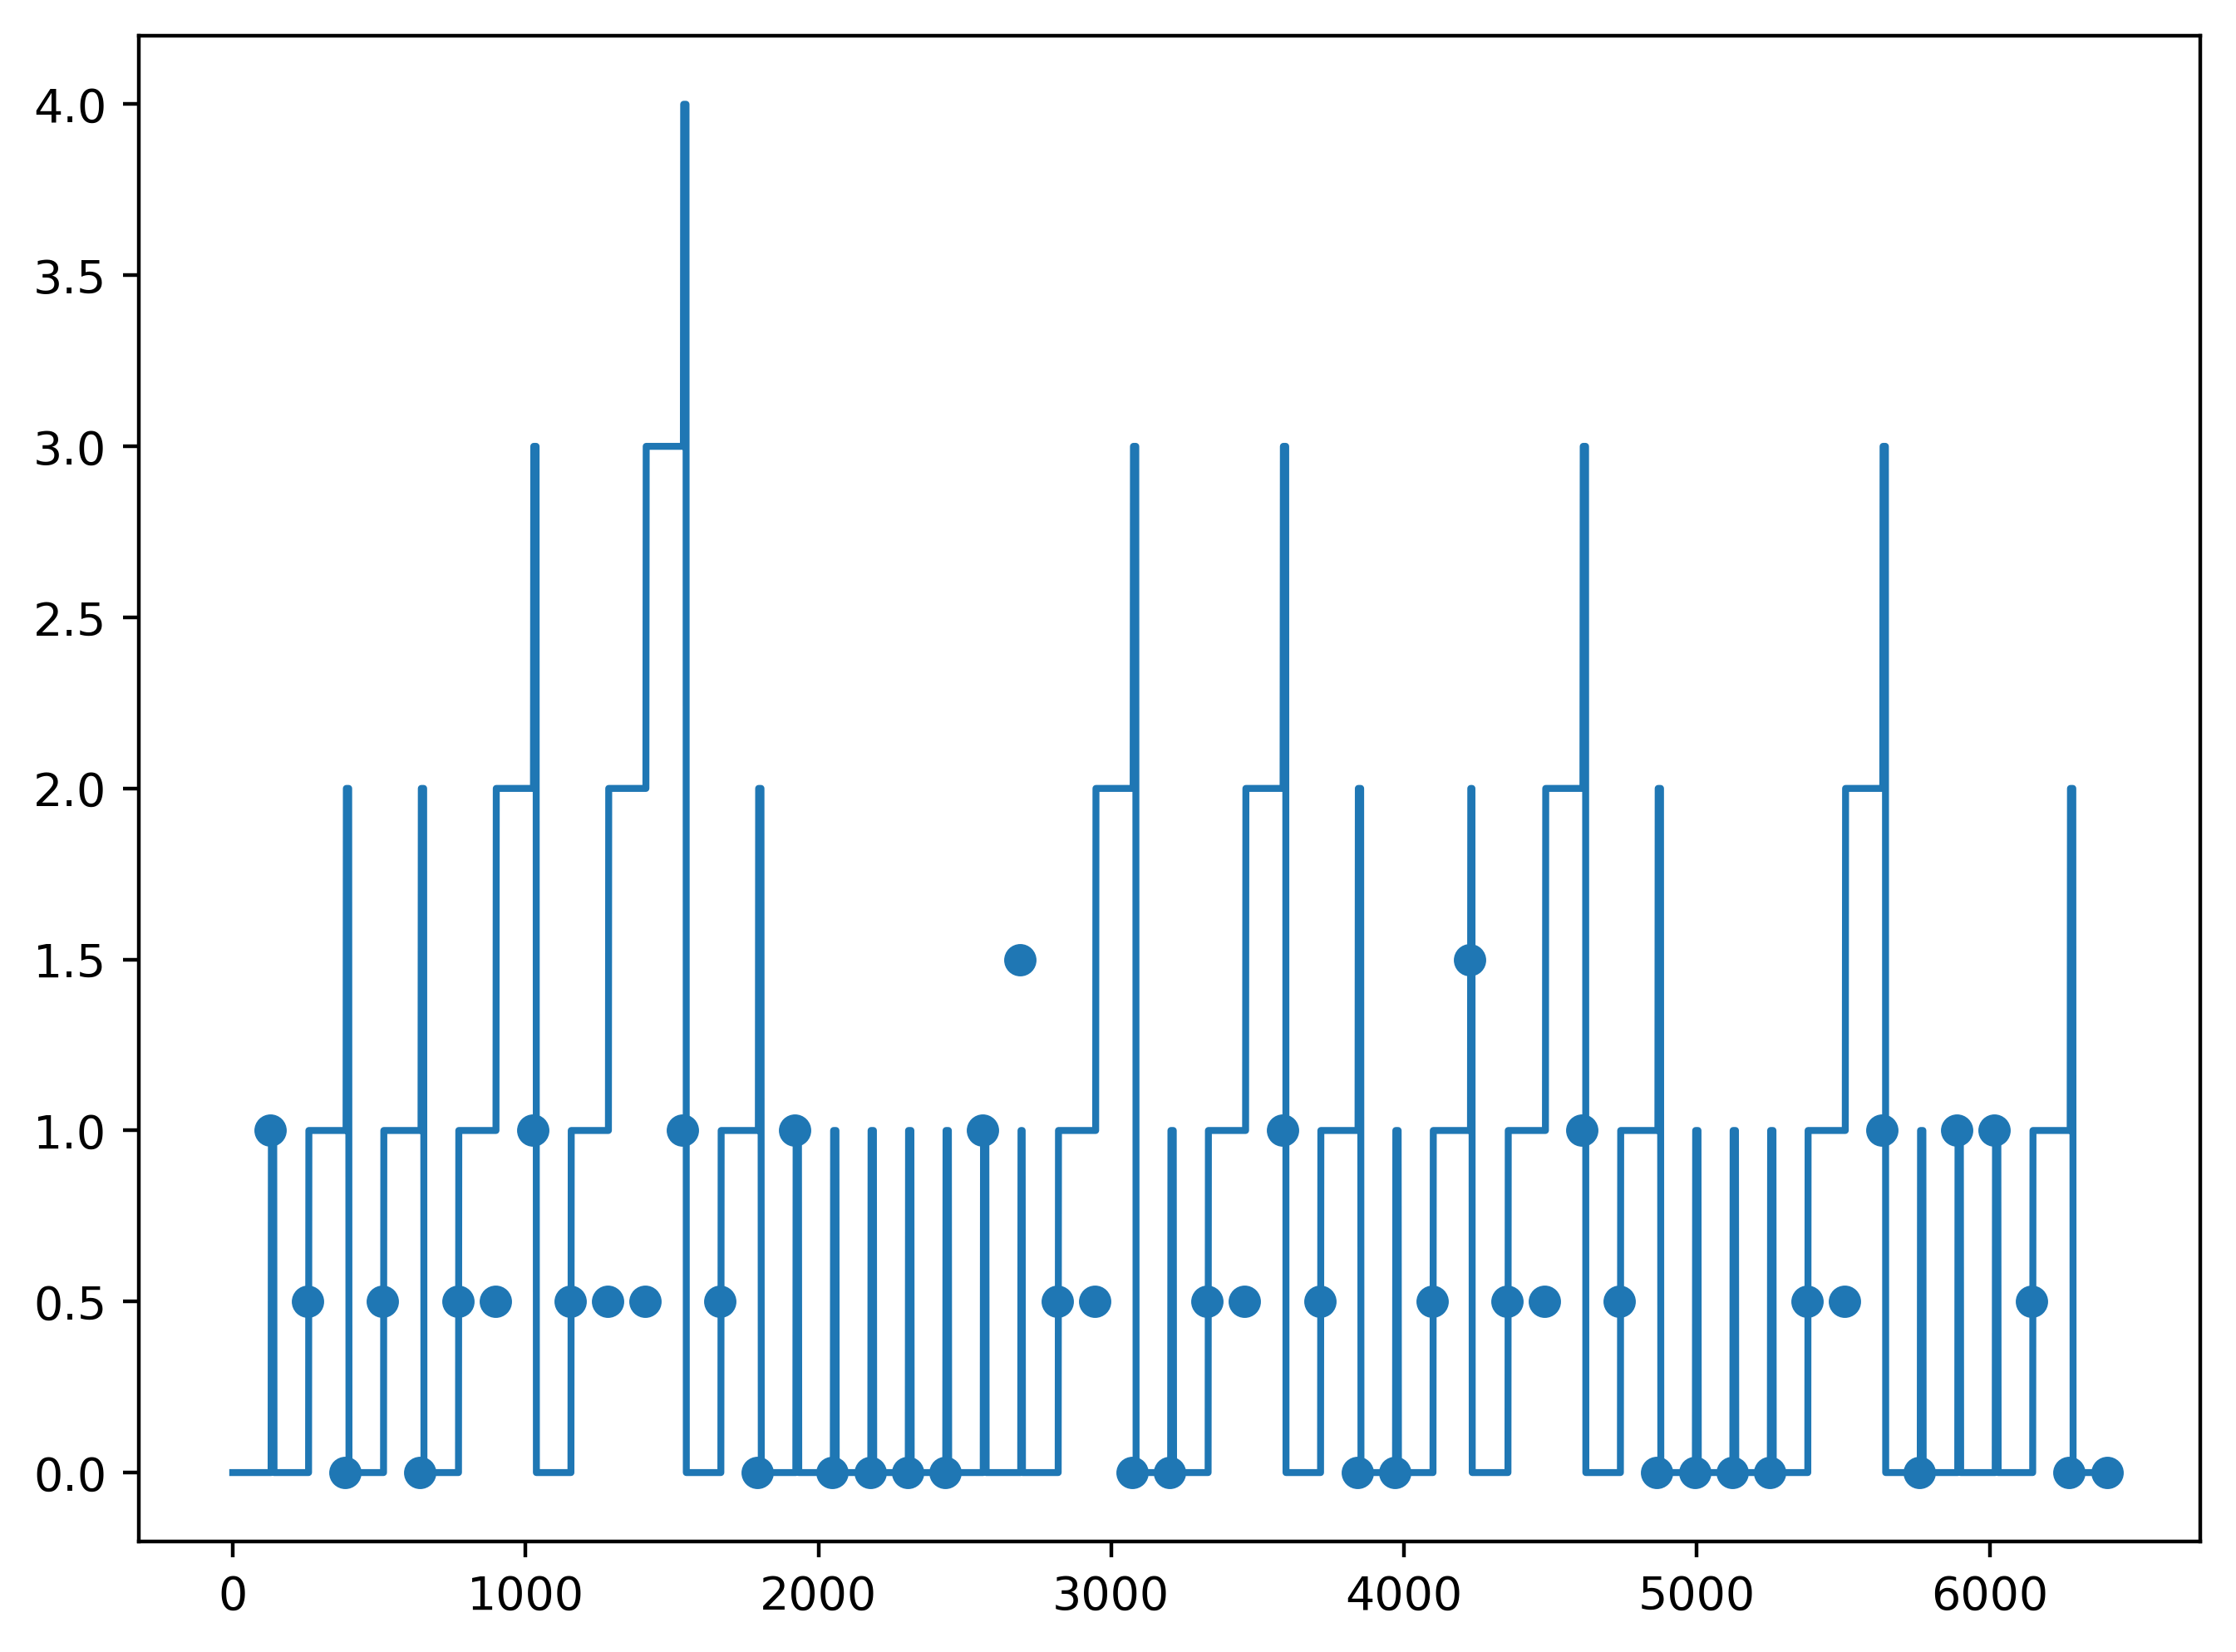

In [23]:
plt.figure(figsize=(8,6),dpi=400)
plt.scatter((np.arange(episodes)+1)*l_epoch, r[1]*0.5+0.5)
plt.plot(unwrap(hc_spks).sum(axis=0))

In [24]:
agent.hippocampus.blocks['reward_buffer'].get_synproto().weight

2

In [25]:
agent.hippocampus.connections['reward_feedbacksum'].numNodes

1

In [26]:
agent.hippocampus.connections['punishment_feedbacksum'].numNodes

1

In [27]:
agent.cortex.blocks['estimates'].noisy

1

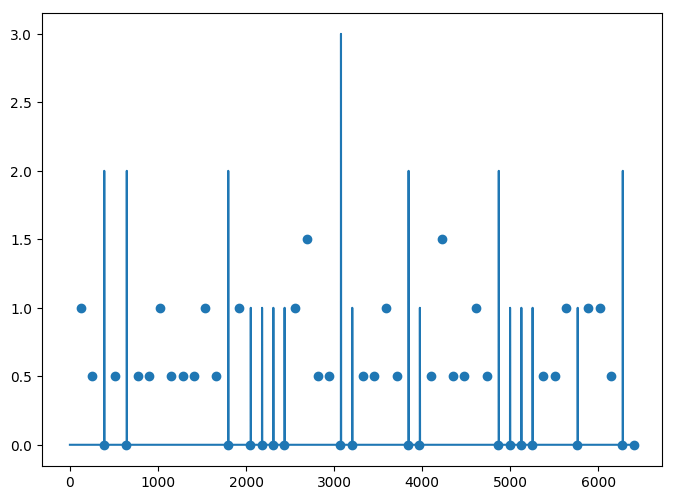

In [28]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter((np.arange(episodes)+1)*l_epoch, r[1]*0.5+0.5)
plt.plot(unwrap(pun_spks).sum(axis=0))

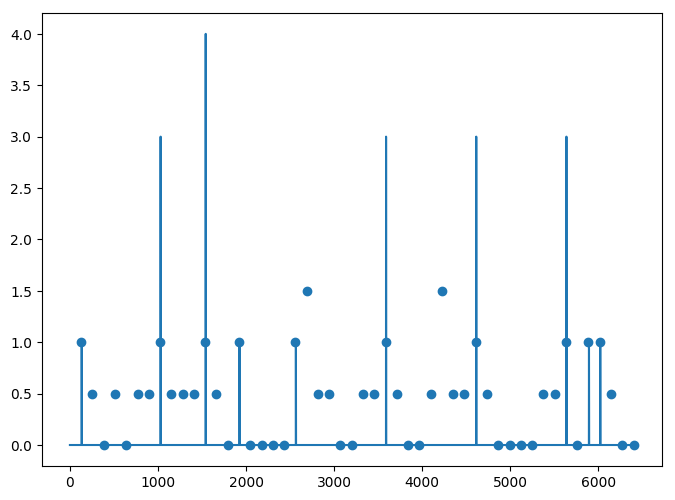

In [29]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter((np.arange(episodes)+1)*l_epoch, r[1]*0.5+0.5)
plt.plot(unwrap(rwd_spks).sum(axis=0))

In [ ]:
for i in range(400):
    plt.plot(np.convolve(unwrap(ctx_spks)[i,:], np.ones(1000), mode='valid')/1000)